### 期末專題製作講解

### 目標 : 估計混合常態的參數 ( N($\upsilon_1$,$\sigma^{2}$))

      fun: 1990.105884313427
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.00355338e-02,  1.60988748e+01,  1.62572179e-02,  6.29825085e-03,
       -6.02540244e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 150
      nit: 21
     njev: 25
   status: 0
  success: True
        x: array([0.24474907, 0.        , 1.06288434, 5.00035532, 1.02240452])


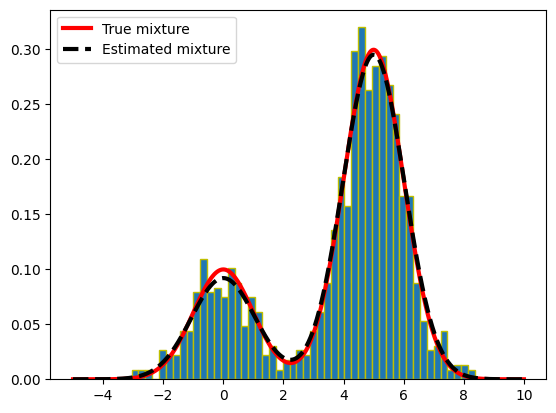

In [20]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import beta, binom,norm
 
# set up the parameters --------------
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 5, 1
# draw the mixture pdf ---------------
f = lambda x: pi1 * norm.pdf(x, mu1, s1) + (1-pi1) * norm.pdf(x, mu2, s2)
x = np.linspace(-5, 10, 1000)
plt.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# generate the simulated sample -------
N = 1000
N1 = binom.rvs(N, pi1)
N2 = N - N1
sample = np.r_[norm.rvs(mu1, s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# # plot histogram ------------------------
plt.hist(sample, 50, edgecolor = 'y', density = True)

# max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, x[1], x[2]) + (1 - x[0]) * norm.pdf(sample, x[3], x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
# pi1 mu1 sig1 mu2 sig2初始值
x0 = [0.5, 1, 2, 3.5, 2] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
# show the results and comapre to res.fun with population parameters
print(res)    
# print(L([pi1, a1, b1, a2, b2])) # the function value of the initial guess
# plot the estimated mixture pdf
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
plt.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
plt.legend()
plt.show()

In [25]:
import numpy as np 
data=np.loadtxt("UV.txt",comments="%")

print(data[0][0:2])


[0.7682156  0.02301604]
